# 🔌 Problem 1: Equivalent Resistance Using Graph Theory

<div style="background-color: #f0f8ff; padding: 15px; border-radius: 10px;">
<h2 style="color: #2E86C1; text-align: center;">📐 Visualizing Circuit Simplification Step-by-Step</h2>
</div>

---

## 🎯 Motivation

Calculating equivalent resistance is a fundamental task in circuit analysis. While series and parallel rules work well for simple circuits, **graph theory** provides a powerful, automated way to analyze **complex resistor networks**.

A circuit is modeled as a graph:
- **Nodes** represent junctions
- **Edges** represent resistors (with weights equal to resistance)

---

## 🧠 Approach

We reduce the graph step by step using:

1. 🔗 **Series Reduction**  
   Two resistors in a chain become one with total resistance:  
   $$ R_{\text{eq}} = R_1 + R_2 $$

2. 🔁 **Parallel Reduction**  
   Two or more resistors between the same nodes:  
   $$ \frac{1}{R_{\text{eq}}} = \frac{1}{R_1} + \frac{1}{R_2} + \cdots $$

3. 🔄 Repeat until the entire network reduces to a single equivalent resistance.

---

## 🧮 Example Circuit

A simple 4-node graph with resistors:

- 2Ω between nodes (1)-(2)  
- 3Ω between nodes (2)-(3)  
- 4Ω between nodes (3)-(4)  
- 1Ω directly between nodes (1)-(4)

---

## ⚙️ Algorithm Pseudocode

```plaintext
while graph not reduced:
    if a node has exactly 2 neighbors:
        combine series resistors
    if parallel resistors exist:
        combine using reciprocal rule


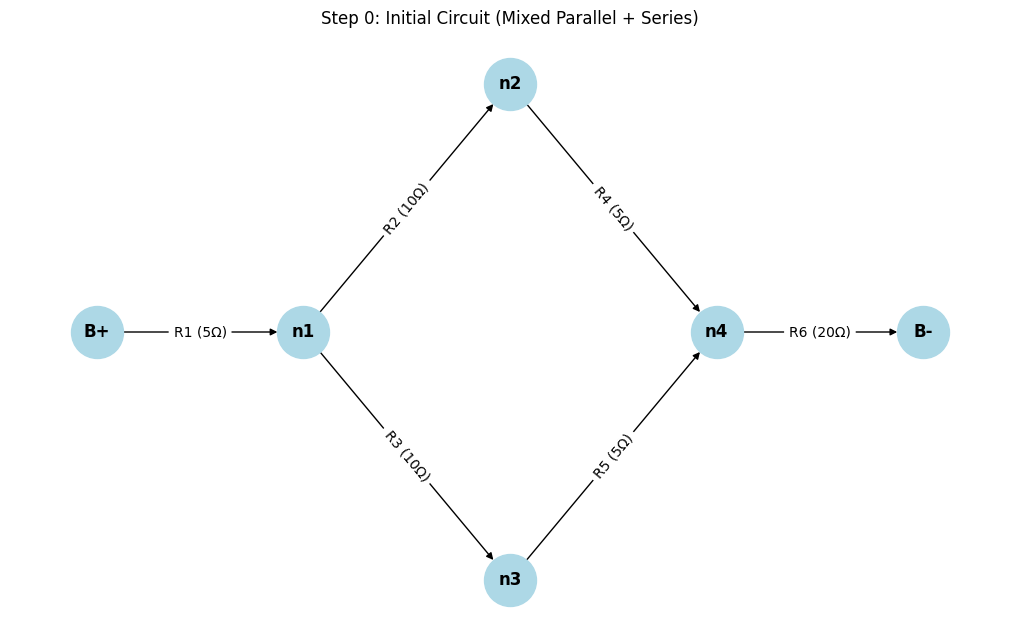

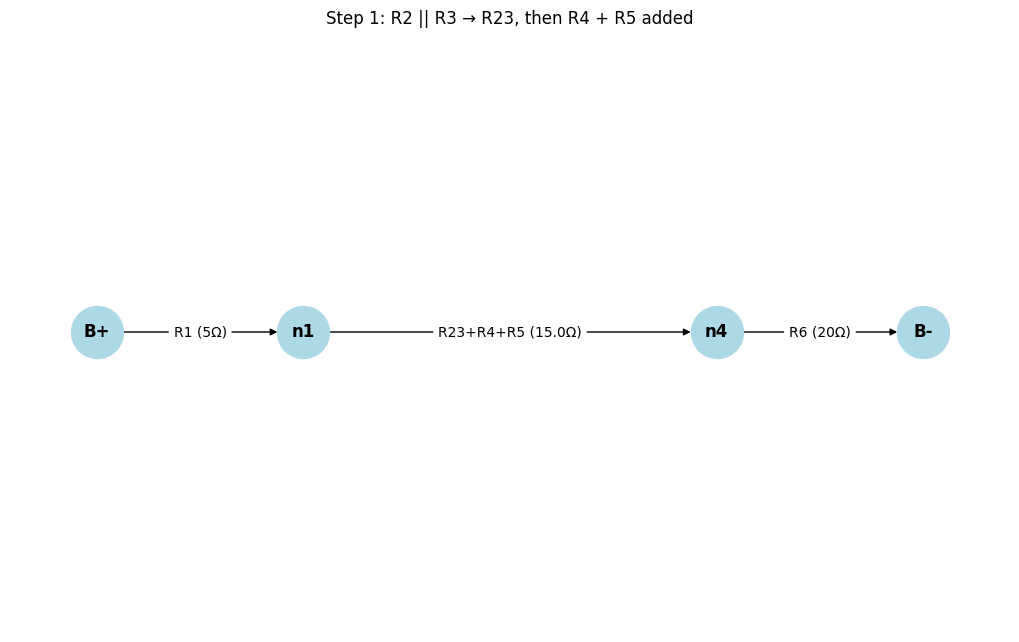

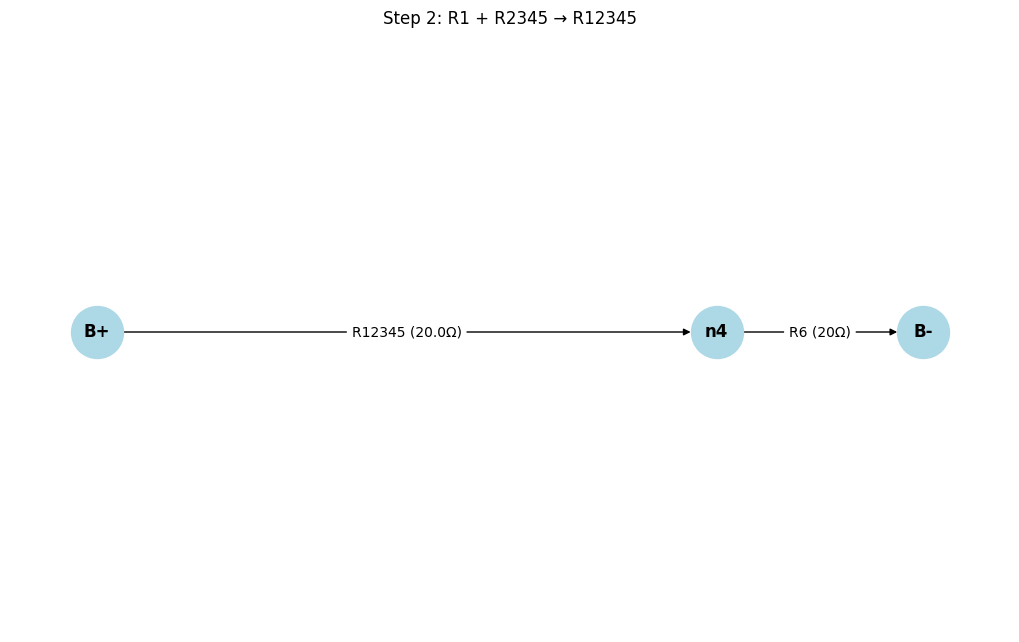

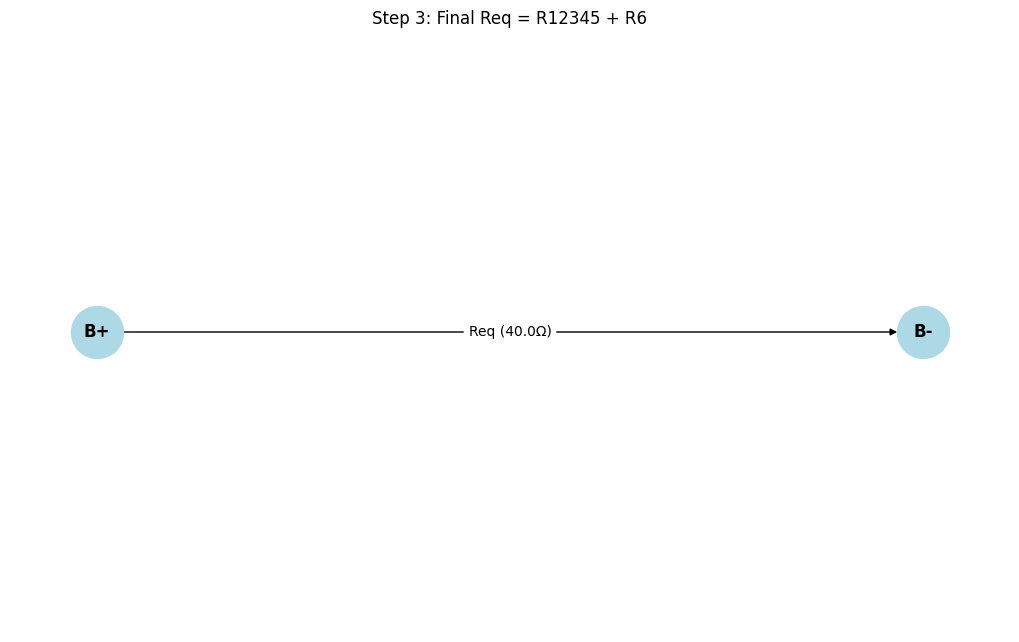

In [18]:
import networkx as nx
import matplotlib.pyplot as plt

def draw_step(G, step, title):
    pos = {
        "B+": (0, 3),
        "n1": (1, 3),
        "n2": (2, 4),
        "n3": (2, 2),
        "n4": (3, 3),
        "B-": (4, 3)
    }
    plt.figure(figsize=(10, 6))
    edge_labels = {(u, v): f"{d['label']} ({d['resistance']}Ω)"
                   for u, v, k, d in G.edges(keys=True, data=True)}
    nx.draw(G, pos, with_labels=True, node_color="lightblue", node_size=1400, font_weight="bold", arrows=True)
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)
    plt.title(title)
    plt.savefig(f"step{step}.png")
    plt.show()

# Step 0: Build initial mixed circuit
G = nx.MultiDiGraph()
G.add_edge("B+", "n1", label="R1", resistance=5)
G.add_edge("n1", "n2", label="R2", resistance=10)
G.add_edge("n1", "n3", label="R3", resistance=10)
G.add_edge("n2", "n4", label="R4", resistance=5)
G.add_edge("n3", "n4", label="R5", resistance=5)
G.add_edge("n4", "B-", label="R6", resistance=20)

step = 0
draw_step(G, step, "Step 0: Initial Circuit (Mixed Parallel + Series)")

# Step 1: Merge R2 and R3 as parallel into R23 between n1 and mid node n23
# We'll create a new intermediate node to merge these as parallel (simulate visual parallel merge)
R2 = G["n1"]["n2"][0]["resistance"]
R3 = G["n1"]["n3"][0]["resistance"]
R23 = round(1 / (1/R2 + 1/R3), 2)
G.remove_edge("n1", "n2", 0)
G.remove_edge("n1", "n3", 0)
G.remove_node("n2")
G.remove_node("n3")
G.add_edge("n1", "n4", label="R23+R4+R5", resistance=R23 + 5 + 5)
step += 1
draw_step(G, step, f"Step {step}: R2 || R3 → R23, then R4 + R5 added")

# Step 2: Merge R1 and (R23+R4+R5) in series
R1 = G["B+"]["n1"][0]["resistance"]
R2345 = G["n1"]["n4"][0]["resistance"]
G.remove_edge("B+", "n1", 0)
G.remove_edge("n1", "n4", 0)
G.remove_node("n1")
G.add_edge("B+", "n4", label="R12345", resistance=R1 + R2345)
step += 1
draw_step(G, step, f"Step {step}: R1 + R2345 → R12345")

# Step 3: Merge R12345 and R6 in series to final Req
R12345 = G["B+"]["n4"][0]["resistance"]
R6 = G["n4"]["B-"][0]["resistance"]
G.remove_edge("B+", "n4", 0)
G.remove_edge("n4", "B-", 0)
G.remove_node("n4")
G.add_edge("B+", "B-", label="Req", resistance=round(R12345 + R6, 2))
step += 1
draw_step(G, step, f"Step {step}: Final Req = R12345 + R6")
